In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
!ls '/content/drive/My Drive/BSEF19M009_THQ3/'

animals


In [20]:
dataset_Path = '/content/drive/My Drive/BSEF19M009_THQ3/animals/'

In [21]:
seed_value = 0

import os
os.environ['PYTHONHASHSEED']=str(seed_value)

import random
random.seed(seed_value)

import cv2

import numpy as np
np.random.seed(seed_value)

import tensorflow as tf
tf.random.set_seed(seed_value)

import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [22]:
# lists to hold data

images = []
labels = []

In [23]:
# listing all folder names in the specified path
folders = os.listdir(dataset_Path)
folders

['cats', 'panda', 'dogs']

In [24]:
# Creating dictionaries to map folder names
count = 0
name_mapping_dict = dict()

for folder_name in folders:
  name_mapping_dict[folder_name] = count
  count += 1


name_mapping_dict

{'cats': 0, 'dogs': 2, 'panda': 1}

In [25]:
inv_name_mapping_dict =  {v: k for k, v in name_mapping_dict.items()}

print(inv_name_mapping_dict)

{0: 'cats', 1: 'panda', 2: 'dogs'}


In [26]:
# Setting image size
img_size = 192

In [27]:
for folder in folders:
  print(f'Processing folder: {folder}')
  filenames = os.listdir(dataset_Path+folder+'/')

  for fname in filenames:
    img = plt.imread(dataset_Path+folder+'/'+fname)
    img = cv2.resize(img, (img_size, img_size))
    if(len(img.shape)==3 and (img.shape)[2]==3):
        images.append(img)    
        labels.append(name_mapping_dict[folder])

Processing folder: cats
Processing folder: panda
Processing folder: dogs


In [28]:
# Converting lists to numpy arrays 
images = np.array(images)
labels = np.array(labels)

In [29]:
print('images shape : ', images.shape)
print('labels shape : ', labels.shape)

images shape :  (3020, 192, 192, 3)
labels shape :  (3020,)


In [30]:
print('images shape : ', images.shape)

images shape :  (3020, 192, 192, 3)


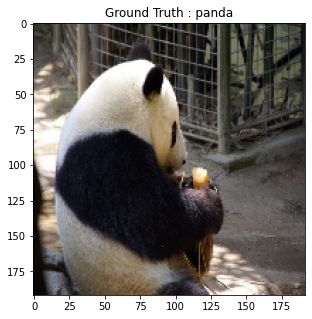

In [31]:
# Plotting samples from data to check if data has been read successfully
img_number = 1000
plt.figure(figsize=[10,5])
plt.imshow(images[img_number])
plt.title("Ground Truth : {}".format(inv_name_mapping_dict[labels[img_number]]))
plt.show()

In [32]:
# Find the unique numbers from the train labels
classes = np.unique(labels)
classes_num = len(classes)
print('Total number of outputs : ', classes_num)
print('Output classes : ', classes)

Total number of outputs :  3
Output classes :  [0 1 2]


In [33]:
# Normalize training image pixels
images = np.array(images) / 255

In [34]:
# Change the labels from integer to categorical data
labels_one_hot = to_categorical(labels)

In [35]:
labels[303]

0

In [36]:
labels_one_hot[303]

array([1., 0., 0.], dtype=float32)

In [37]:
# Shuffling and Splittng Dataset
from sklearn.model_selection import train_test_split

train_images, test_images, train_labels, test_labels = train_test_split(images, labels_one_hot, test_size=0.20, shuffle=True, random_state=0)


print('Training data shape : ', train_images.shape, train_labels.shape)
print('Testing data shape : ', test_images.shape, test_labels.shape)

Training data shape :  (2416, 192, 192, 3) (2416, 3)
Testing data shape :  (604, 192, 192, 3) (604, 3)


In [38]:
print(train_images[0].shape)

(192, 192, 3)


In [39]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten

"""
Pre-trained model examples are as follows:


pretrained_model = tf.keras.applications.MobileNetV2(input_shape=(img_size, img_size, 3), include_top=False)
pretrained_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False ,input_shape=(img_size, img_size, 3))
pretrained_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
pretrained_model = tf.keras.applications.MobileNet(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
"""

pretrained_model = tf.keras.applications.MobileNet(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
pretrained_model.trainable = False

model = Sequential()
model.add(pretrained_model)
model.add(Flatten())
model.add(Dense(classes_num, activation="softmax"))

17235968/17225924 [==============================] - 0s 0us/step


In [40]:
print(classes_num)

3


In [41]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [42]:
history = model.fit(train_images, train_labels, batch_size=64,  epochs=10, verbose=1, validation_data=(test_images, test_labels))

Epoch 1/10
38/38 [==============================] - 74s 2s/step - loss: 1.0894 - accuracy: 0.9048 - val_loss: 0.2685 - val_accuracy: 0.9735
Epoch 2/10
38/38 [==============================] - 68s 2s/step - loss: 0.0465 - accuracy: 0.9921 - val_loss: 0.1568 - val_accuracy: 0.9735
Epoch 3/10
38/38 [==============================] - 68s 2s/step - loss: 0.0011 - accuracy: 0.9996 - val_loss: 0.1535 - val_accuracy: 0.9818
Epoch 4/10
38/38 [==============================] - 68s 2s/step - loss: 8.9043e-05 - accuracy: 1.0000 - val_loss: 0.1595 - val_accuracy: 0.9801
Epoch 5/10
38/38 [==============================] - 70s 2s/step - loss: 9.5571e-06 - accuracy: 1.0000 - val_loss: 0.1587 - val_accuracy: 0.9801
Epoch 6/10
38/38 [==============================] - 68s 2s/step - loss: 6.4167e-06 - accuracy: 1.0000 - val_loss: 0.1586 - val_accuracy: 0.9801
Epoch 7/10
38/38 [==============================] - 68s 2s/step - loss: 5.3949e-06 - accuracy: 1.0000 - val_loss: 0.1584 - val_accuracy: 0.9801
Epoc

In [43]:
[test_loss, test_acc] = model.evaluate(test_images, test_labels)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}%".format(test_loss, test_acc*100))

19/19 [==============================] - 14s 724ms/step - loss: 0.1580 - accuracy: 0.9801
Evaluation result on Test Data : Loss = 0.15796440839767456, accuracy = 98.01324605941772%


In [44]:
[train_loss, train_acc] = model.evaluate(train_images, train_labels)
print("Evaluation result on train Data : Loss = {}, accuracy = {}%".format(train_loss, train_acc*100))

76/76 [==============================] - 56s 736ms/step - loss: 3.5238e-06 - accuracy: 1.0000
Evaluation result on train Data : Loss = 3.5238424516137457e-06, accuracy = 100.0%


In [45]:
model_path = '/content/drive/My Drive/BSEF19M009_THQ3/'

model.save(model_path+'Three_Animals_Classified_model.h5')

In [46]:
def test_single_image(test_img_number):

  # make prediction
  prediction = inv_name_mapping_dict[np.argmax(model.predict(test_images[[test_img_number],:])[0])]
  print("Model prediction: {}".format(prediction))

  # Display the predicted image
  plt.imshow(test_images[test_img_number])
  plt.title("Ground Truth : {}".format(inv_name_mapping_dict[np.argmax(test_labels[test_img_number])]))
  plt.xticks([])
  plt.yticks([])
  plt.show()

Model prediction: cats


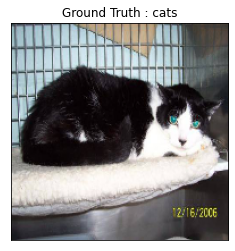

In [47]:
test_single_image(test_img_number=0)

Model prediction: panda


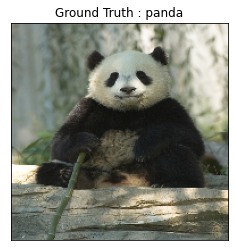

In [58]:
test_single_image(test_img_number=21)

Model prediction: cats


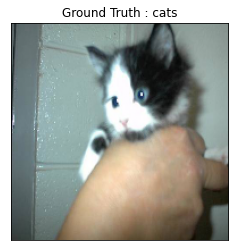

In [49]:
test_single_image(test_img_number=534)

Model prediction: panda


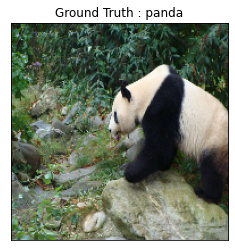

In [56]:
test_single_image(test_img_number=522)

Model prediction: dogs


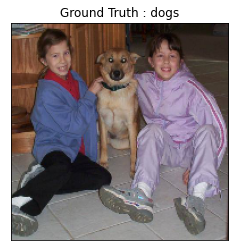

In [54]:
test_single_image(test_img_number=170)